In [1]:
import pandas as pd 
from scipy.stats import f_oneway 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,Ridge

In [2]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [3]:
# columns = [column for column in diabetes_df.columns]
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
columns  = [col for col in diabetes_df.columns if diabetes_df[col].dtype != 'object']

In [5]:
def Anova(columns):
    output = {}
    for col in columns:
        catagorical =list(diabetes_df['Outcome'].value_counts().index)
        p_value = f_oneway(*[diabetes_df[diabetes_df['Outcome'] == cat ][col]   for cat in catagorical])[1]
        if p_value < 0.05:
            output[col] = {'Correlated'}
        else:
            output[col] = {'Not Correlated'}
    return output
Anova(columns)

C:\Users\pbandi\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


{'Pregnancies': {'Correlated'},
 'Glucose': {'Correlated'},
 'BloodPressure': {'Not Correlated'},
 'SkinThickness': {'Correlated'},
 'Insulin': {'Correlated'},
 'BMI': {'Correlated'},
 'DiabetesPedigreeFunction': {'Correlated'},
 'Age': {'Correlated'},
 'Outcome': {'Correlated'}}

In [6]:
# The Avarage age of all the Patients who are having the Dis
having_dia = diabetes_df['Outcome'] == '1'
x = diabetes_df[diabetes_df['Outcome'] == 1]
x['Age'].mean()

37.06716417910448

In [7]:
# Calcuate the columns having outliers 
def Calculate_outliers(col):
    q1 = (col.describe())['25%']
    q3 = (col.describe())['75%']
    iqr = q3 - q1
    hvo,lvo = [],[]
    count =  0
    for value in col:
        if (value) > (q3 + (1.5* (iqr))):
            hvo.append(value)
            count = count + 1
        elif value < q1 - (1.5*(iqr)):
            lvo.append(value)
            count = count + 1
    total = [hvo,lvo]
    return count 
Ages = Calculate_outliers(diabetes_df['Age'])
Pregnancies = Calculate_outliers(diabetes_df['Pregnancies'])
Glucose = Calculate_outliers(diabetes_df['Glucose'])
SkinThickness = Calculate_outliers(diabetes_df['SkinThickness'])
Insulin = Calculate_outliers(diabetes_df['Insulin'])
BMI = Calculate_outliers(diabetes_df['BMI'])

In [8]:
y = diabetes_df['Outcome']
diabetes_df.drop(columns = 'Outcome',inplace = True)

In [9]:
x = diabetes_df
x_train,x_test,y_train,y_test = train_test_split(diabetes_df,y,train_size=0.8,random_state=1)

In [10]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [11]:
logreg = LogisticRegression() # Instance of an Object where logreg is the object and LogisticRegression is the Class 
logreg.fit(x_train,y_train)

C:\Users\pbandi\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = logreg.predict(x_test)
comparsion_df = pd.DataFrame({"Actuvals":y_test,'Predicts':y_pred})

In [13]:
confusion_matrix(y_test,y_pred)

array([[89, 10],
       [24, 31]], dtype=int64)

In [14]:
accuracy_score(y_test,y_pred)
precision_score(y_test,y_pred)
f1_score(y_test,y_pred)

0.6458333333333333

In [15]:
logreg.predict_proba(x_test) # Returns the Probablity estimates 

array([[0.54749969, 0.45250031],
       [0.68726417, 0.31273583],
       [0.84936802, 0.15063198],
       [0.96018059, 0.03981941],
       [0.79995088, 0.20004912],
       [0.75003034, 0.24996966],
       [0.63617482, 0.36382518],
       [0.89929419, 0.10070581],
       [0.86615435, 0.13384565],
       [0.83206623, 0.16793377],
       [0.54729871, 0.45270129],
       [0.92492226, 0.07507774],
       [0.00888184, 0.99111816],
       [0.24786997, 0.75213003],
       [0.94728874, 0.05271126],
       [0.25482604, 0.74517396],
       [0.77578223, 0.22421777],
       [0.688436  , 0.311564  ],
       [0.88185299, 0.11814701],
       [0.83296902, 0.16703098],
       [0.55300403, 0.44699597],
       [0.82231232, 0.17768768],
       [0.03131175, 0.96868825],
       [0.7354923 , 0.2645077 ],
       [0.93214844, 0.06785156],
       [0.62529872, 0.37470128],
       [0.82652715, 0.17347285],
       [0.1913184 , 0.8086816 ],
       [0.9155704 , 0.0844296 ],
       [0.42030118, 0.57969882],
       [0.

In [16]:
pos_probab = logreg.predict_proba(x_test)[:,1]

In [17]:
fpr,tpr,thresholds = roc_curve(y_test,pos_probab)

In [18]:
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.01010101, 0.01010101,
        0.03030303, 0.03030303, 0.04040404, 0.04040404, 0.06060606,
        0.06060606, 0.08080808, 0.08080808, 0.09090909, 0.09090909,
        0.1010101 , 0.1010101 , 0.11111111, 0.11111111, 0.13131313,
        0.13131313, 0.14141414, 0.14141414, 0.15151515, 0.15151515,
        0.17171717, 0.17171717, 0.19191919, 0.19191919, 0.23232323,
        0.23232323, 0.25252525, 0.25252525, 0.26262626, 0.26262626,
        0.33333333, 0.33333333, 0.39393939, 0.39393939, 0.41414141,
        0.41414141, 0.47474747, 0.47474747, 0.49494949, 0.49494949,
        0.60606061, 0.60606061, 0.62626263, 0.62626263, 0.96969697,
        0.96969697, 0.98989899, 0.98989899, 1.        ]),
 array([0.        , 0.01818182, 0.29090909, 0.29090909, 0.30909091,
        0.30909091, 0.38181818, 0.38181818, 0.47272727, 0.47272727,
        0.49090909, 0.49090909, 0.50909091, 0.50909091, 0.54545455,
        0.54545455, 0.56363636, 0.56363636, 0.58181818, 0.

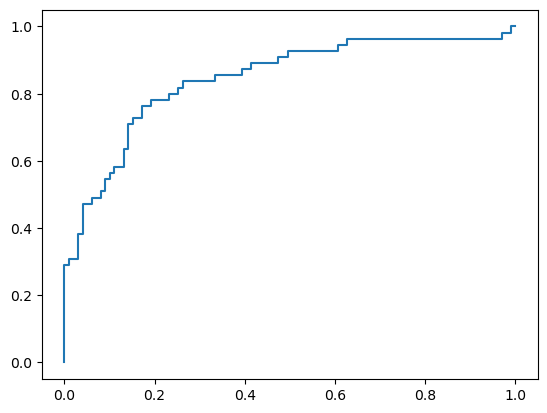

In [19]:
plt.plot(fpr,tpr)

Text(0, 0.5, 'True Positive Rate')

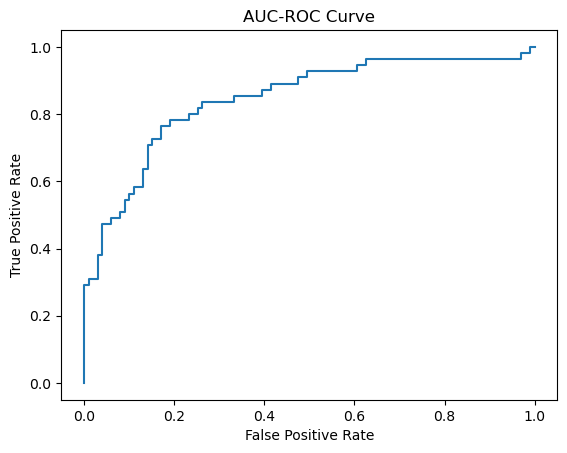

In [20]:
plt.plot(fpr,tpr)
roc_auc_score(y_test,y_pred)
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [21]:
Trian Score (95 % )
Test Score (45 % )
It is not good model 
OverFitting 
Definations : if the diffrence betweeen Train and Test Accuracies is very Huge.
If the model learns noise,
If the model is not able to generalise well to the unseen data


SyntaxError: invalid syntax (1097282541.py, line 1)

In [ ]:
lasso = Lasso(alpha = 1)
lasso.fit(x_train,y_train)
lasso.coef_

In [ ]:
ridge = Ridge(alpha = 1)

ridge.fit(x_train,y_train)
ridge.coef_

In [ ]:
import pickle

with open('logreg.pkl','wb') as f:
    pickle.dump(logreg,f)

In [ ]:
with open('logreg.pkl','rb') as f:
    model = pickle.load(f)